In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

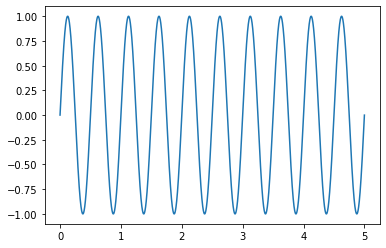

In [3]:
sample_rate = 44100
duration = 5

def generateSineWave(frequency, sample_rate, duration):
    t = np.linspace(0, duration, duration*sample_rate, endpoint = False) #create all the discrete time steps
    sin_x = np.sin(2*np.pi*frequency*t) #2pift
    return (t, sin_x)

(x, y) = generateSineWave(2, sample_rate, duration)
plt.plot(x,y)

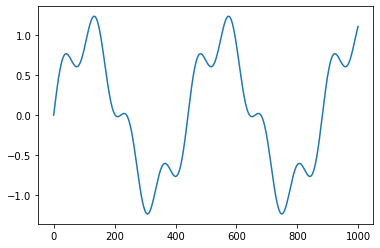

In [4]:
_, tone1 = generateSineWave(100, sample_rate, duration)
_, tone2 = generateSineWave(400, sample_rate, duration)
tone2 = tone2*0.3 #scale it down

resultant = tone1 + tone2
plt.plot(resultant[:1000])

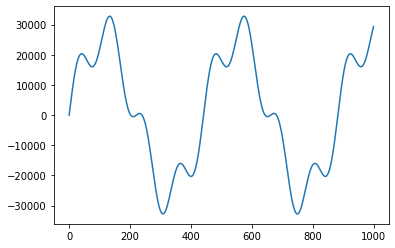

In [5]:
resultant = (np.int16)((resultant/resultant.max()) * 32767)
plt.plot(resultant[:1000])

(-1000.0, 1000.0)

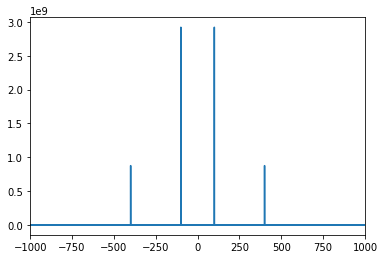

In [15]:
nSamples = sample_rate*duration

y = fft(resultant)
x = fftfreq(nSamples, 1/sample_rate)

plt.plot(x, np.abs(y))
plt.xlim(-1000,1000)

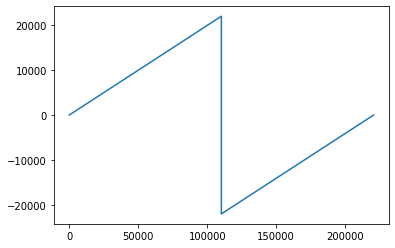

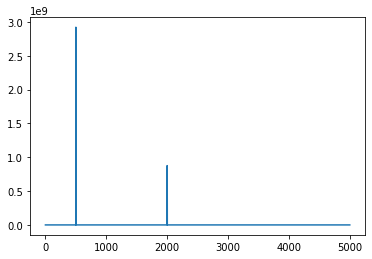

In [19]:
plt.plot(x)
plt.show()
plt.plot(np.abs(y)[:5000])
plt.show()

In [20]:
print(x.max())

22049.800000000003


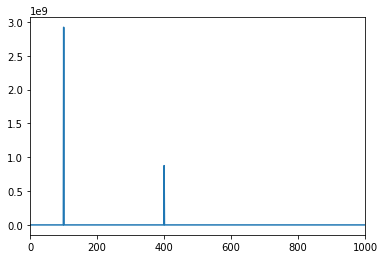

(0.0, 1000.0)

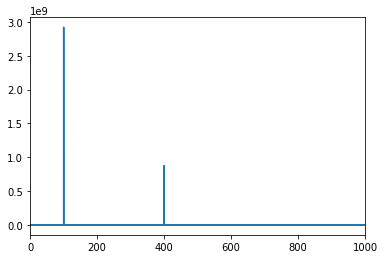

In [26]:
plt.plot(np.abs(y)[::5]) 
plt.xlim(0,1000)
plt.show()
plt.plot(x, np.abs(y))
plt.xlim(0,1000)

So essentially the intuition is this:
the nth element in the fft's output corresponds the the spectral power of the frequency component that would have n complete cycles in the window.

Example:
The 2000th output of the fft represents the frequency component with 2000 cycles in the 5\*44110 samples.
5 seconds -> 2000 cycles
1 second -> 400 cycles -> 400 Hz (voila)

The Nyquist frequency is 22050 Hz, the 110250th output of the fft corresponds to a component whose "polarity" flips every 2 samples, implying Fs/2 = 22050 Hz